# Data Loading

[Super Store Dataset](https://public.tableau.com/app/learn/sample-data)

> Contains information about products, sales, and profits that you can use to identify key areas of improvement within this fictitious company.

In [ ]:
# import library
import pandas as pd
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Load the saved data and copy the data so that the original data does not change.

In [2]:
# read csv file yang sudah di save
data1 = pd.read_excel('sample_-_superstore.xls')

# duplicate data ori
df = data1.copy()

# Preview data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [ ]:
# Load sheet 'Returns' from the Excel file
buy_again = pd.read_excel('sample_-_superstore.xls',sheet_name='Returns')
buy_again

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999
...,...,...
291,Yes,CA-2015-101910
292,Yes,CA-2017-156958
293,Yes,CA-2016-105585
294,Yes,CA-2016-148796


# Data Processing & Cleaning

## Initial Data Exploration

### Main Table

In [ ]:
# View a summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
# Check top 5 rows of the dataframe
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [6]:
# Check for missing values in the dataframe
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
# Check for duplicate rows in the dataframe
df.duplicated().sum()

0

### Secondary Table

In [14]:
buy_again.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  296 non-null    object
 1   Order ID  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [13]:
buy_again.isnull().sum()

Returned    0
Order ID    0
dtype: int64

In [12]:
buy_again.duplicated().sum()

0

In [15]:
buy_again.head()

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999


Let's create a new column that shows whether the customer made a buy again or not.

In [10]:
# Add a new column 'Buy Again' to the original dataframe
df['Buy Again'] = df['Order ID'].isin(buy_again['Order ID'])

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Buy Again
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91,False
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58,False
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87,False
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03,False
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52,False


In [8]:
# Display the columns of the dataframe
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [11]:
df['Buy Again'].value_counts()

Buy Again
False    9194
True      800
Name: count, dtype: int64

In [20]:
# Display the unique values in the 'Category' column
for i in df.columns:
    print(f'Unique values in {i} : {df[i].nunique()}')

Unique values in Row ID : 9994
Unique values in Order ID : 5009
Unique values in Order Date : 1237
Unique values in Ship Date : 1334
Unique values in Ship Mode : 4
Unique values in Customer ID : 793
Unique values in Customer Name : 793
Unique values in Segment : 3
Unique values in Country : 1
Unique values in City : 531
Unique values in State : 49
Unique values in Postal Code : 631
Unique values in Region : 4
Unique values in Product ID : 1862
Unique values in Category : 3
Unique values in Sub-Category : 17
Unique values in Product Name : 1850
Unique values in Sales : 6144
Unique values in Quantity : 14
Unique values in Discount : 12
Unique values in Profit : 7545
Unique values in Buy Again : 2


Save the cleaned file for data visualization

In [ ]:
# Save the cleaned dataframe to a new Excel file
df.to_excel('df_cleaned.xlsx', index=False)

In [19]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Row ID,9994.00,4997.50,1.00,2499.25,4997.50,7495.75,9994.00,2885.16
Order Date,9994,2016-04-30 00:07:12.259355648,2014-01-03 00:00:00,2015-05-23 00:00:00,2016-06-26 00:00:00,2017-05-14 00:00:00,2017-12-30 00:00:00,NaN
Ship Date,9994,2016-05-03 23:06:58.571142912,2014-01-07 00:00:00,2015-05-27 00:00:00,2016-06-29 00:00:00,2017-05-18 00:00:00,2018-01-05 00:00:00,NaN
Postal Code,9994.00,55190.38,1040.00,23223.00,56430.50,90008.00,99301.00,32063.69
Sales,9994.00,229.86,0.44,17.28,54.49,209.94,22638.48,623.25
Quantity,9994.00,3.79,1.00,2.00,3.00,5.00,14.00,2.23
Discount,9994.00,0.16,0.00,0.00,0.20,0.20,0.80,0.21
Profit,9994.00,28.66,-6599.98,1.73,8.67,29.36,8399.98,234.26


# Performance Analysis and Visualizations

In [21]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Buy Again
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91,False
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58,False
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87,False
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03,False
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52,False


# Sales, Quantity, Profit per Month and Year

In [25]:
# Create new columns for month and year.
df['Order_Month'] = df['Order Date'].dt.to_period('M').astype(str)

# Aggregation per month
monthly_sales = df.groupby('Order_Month').agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'Profit': 'sum'
}).reset_index()

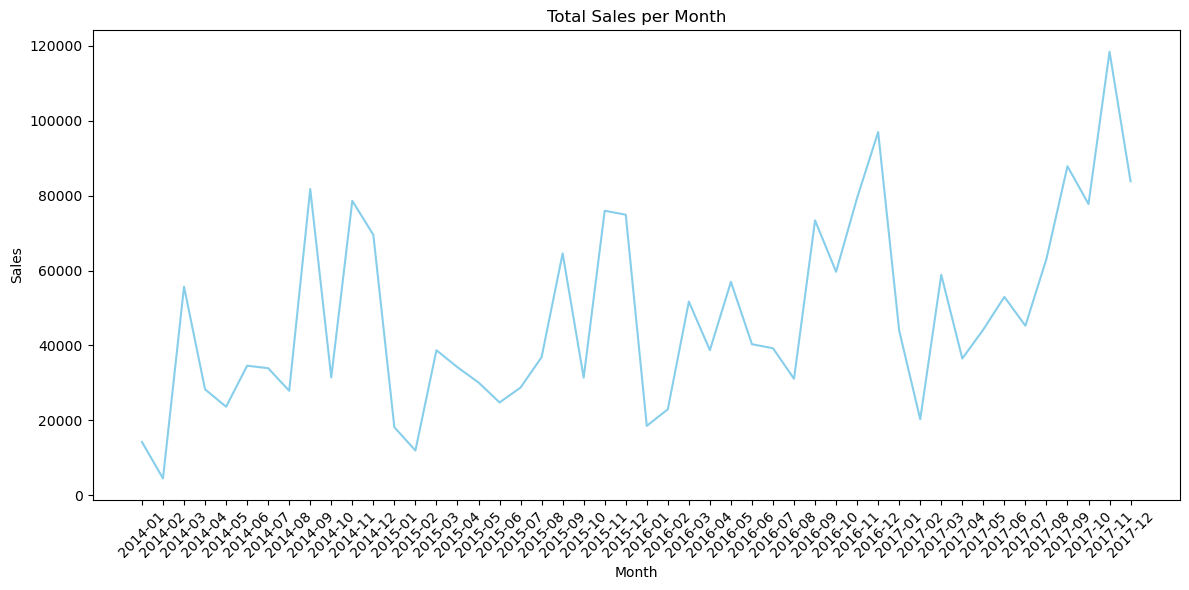

In [26]:
# Total Sales per Month
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Order_Month'], monthly_sales['Sales'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

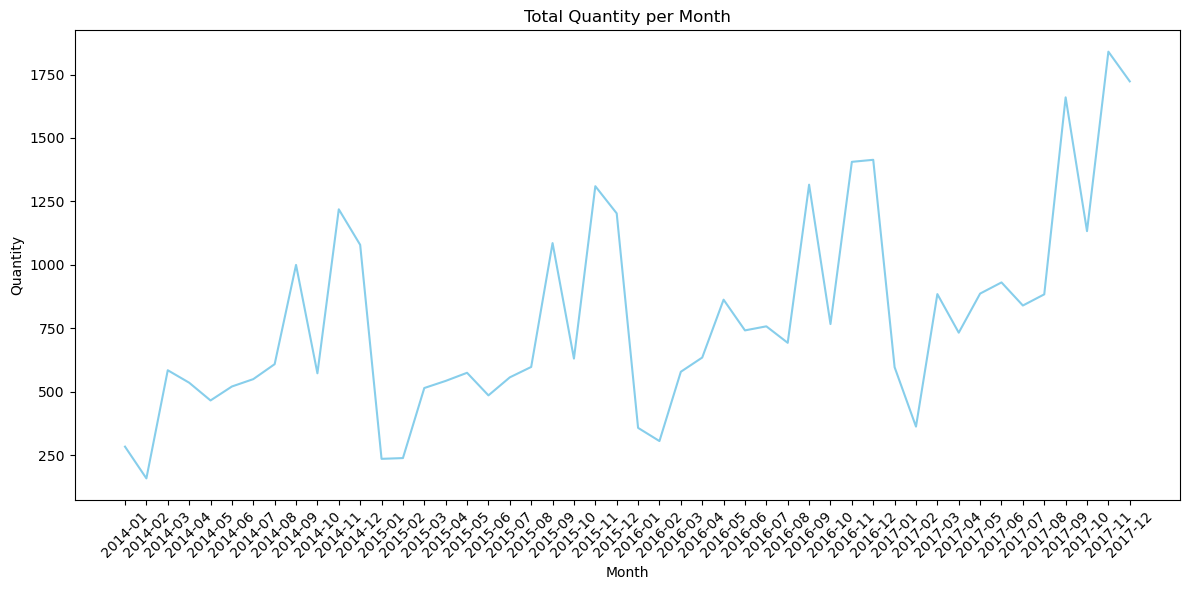

In [27]:
# Total Quantity per Month
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Order_Month'], monthly_sales['Quantity'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Total Quantity per Month')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()

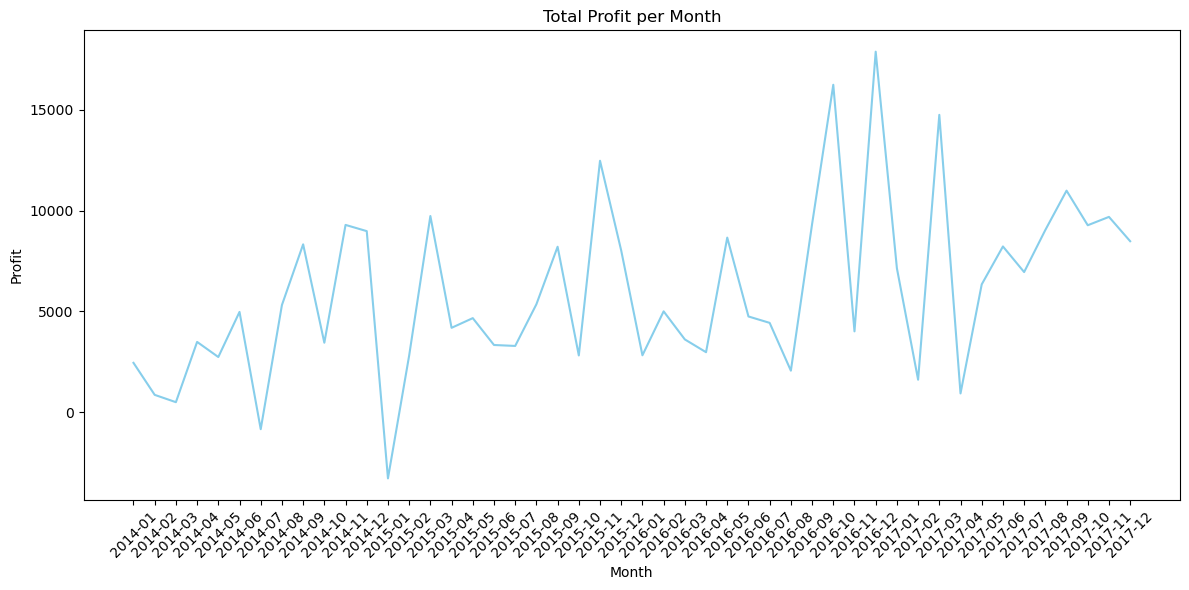

In [28]:
# Total Profit per Month
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Order_Month'], monthly_sales['Profit'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Total Profit per Month')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

## From this line chart we get insight :

**Insight 1**: Seasonal Trend

"There is a spike in sales and number of items sold towards the end of the year, indicating a seasonal pattern."

This indicates that:
- Customers tend to make large purchases towards the end of the year.
- There is a possible influence from events such as Christmas, New Year, and end-of-year holidays.

**Insight 2**: Impact of Events or Promos

"The significant increase is likely driven by end-of-year promo or discount programs that increase customer purchasing power."

For example:
- Promos such as 11.11, 12.12, Harbolnas, or end-of-year clearance can drive the spike.

**Insight 3**: Stock Planning and Marketing Strategy

"Towards the end of the year is an important momentum to maximize sales strategies and stock planning."

Operational advice:
- Ensure sufficient stock ahead of Q4.
- Focus marketing campaigns in October–December.

# Top 5 and Bottom 5 Cities per Year

In [37]:
# Step 1: Pastikan format datetime dan ambil tahun
df['Year'] = df['Order Date'].dt.year

# Step 2: Groupby City dan Year
city_year = df.groupby(['City', 'Year']).agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'Profit': 'sum'
}).reset_index()

In [43]:
city_year[city_year['Year'] == 2017].sort_values(by='Sales', ascending=False)

,City,Year,Sales,Quantity,Profit
739,New York City,2017,86939.60,1132,22406.03
1040,Seattle,2017,56990.82,682,15518.70
596,Los Angeles,2017,48875.69,840,10059.29
853,Philadelphia,2017,41595.50,665,-4995.09
1008,San Francisco,2017,37197.55,771,6617.95
...,...,...,...,...,...
804,Ormond Beach,2017,2.81,3,-1.97
296,Edinburg,2017,2.37,2,0.83
500,Jupiter,2017,2.06,1,0.15
310,Elyria,2017,1.82,1,-1.40


In [44]:
city_year[city_year['Year'] == 2017].sort_values(by='Quantity', ascending=False)

,City,Year,Sales,Quantity,Profit
739,New York City,2017,86939.60,1132,22406.03
596,Los Angeles,2017,48875.69,840,10059.29
1008,San Francisco,2017,37197.55,771,6617.95
1040,Seattle,2017,56990.82,682,15518.70
853,Philadelphia,2017,41595.50,665,-4995.09
...,...,...,...,...,...
500,Jupiter,2017,2.06,1,0.15
879,Port Orange,2017,7.82,1,2.93
713,Murfreesboro,2017,15.99,1,1.00
310,Elyria,2017,1.82,1,-1.40


In [45]:
city_year[city_year['Year'] == 2017].sort_values(by='Profit', ascending=False)

,City,Year,Sales,Quantity,Profit
739,New York City,2017,86939.60,1132,22406.03
1040,Seattle,2017,56990.82,682,15518.70
596,Los Angeles,2017,48875.69,840,10059.29
1008,San Francisco,2017,37197.55,771,6617.95
743,Newark,2017,13808.47,103,5468.27
...,...,...,...,...,...
600,Louisville,2017,7338.56,106,-2402.45
467,Houston,2017,16212.81,392,-3853.74
853,Philadelphia,2017,41595.50,665,-4995.09
133,Burlington,2017,12950.90,67,-5404.37


**Insight:**

- From this table we can see that in 2017 New York City became the city with the best performance value for Sales, Quantity and Profit.
- While Jupiter and Elyria are included in the bottom 5 cities for Sales and Quantity, indicating that the city has poor development.
- For the worst profit is Chicago with a profit value of -5.701

---